In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

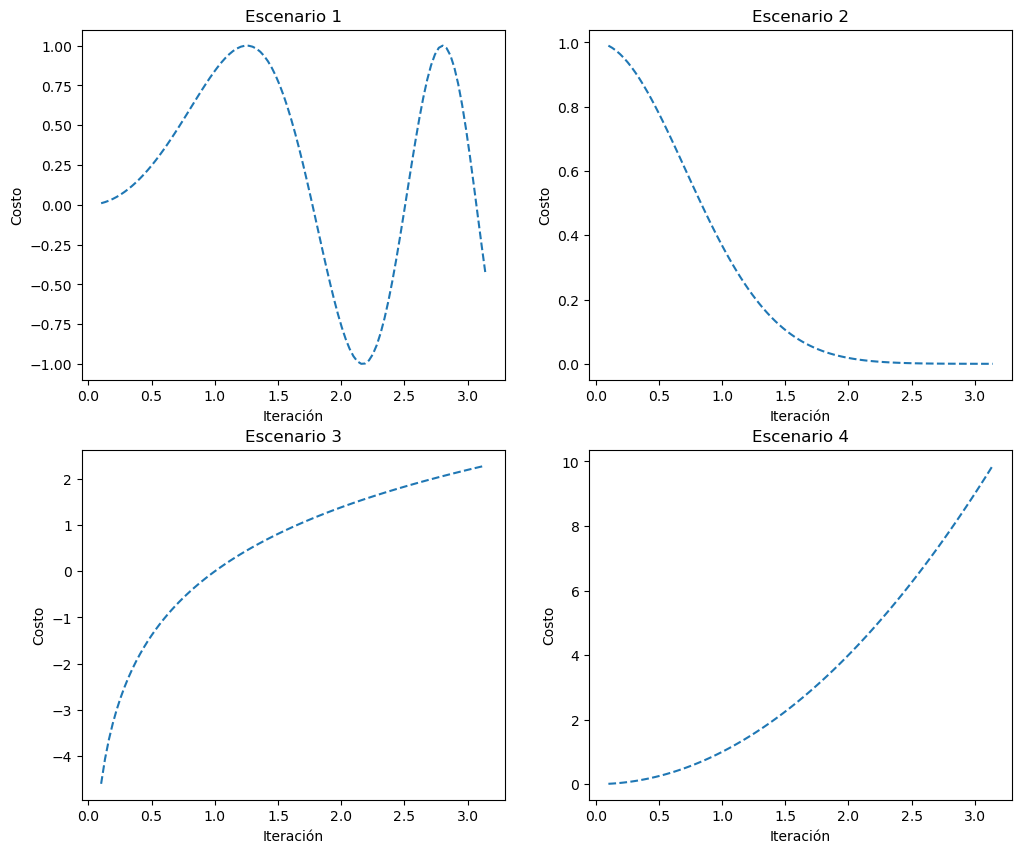

In [3]:
' Simple subplots template '

fig, ax = plt.subplots(2,2, figsize=(12,10))

x = y = 0

space = np.linspace(1.e-1, np.pi, 100)
sine = np.sin(space ** 2)
euler = np.exp(-space ** 2)
loge = np.log(space ** 2)
square = space ** 2

e = [sine, euler, loge, square]

for i in range(4):
    if y == 2:
        x += 1
        y = 0

    ax[x][y].plot(space, e[i], '--')
    ax[x][y].set_title(f'Escenario {i+1}')
    ax[x][y].set_xlabel('Iteración')
    ax[x][y].set_ylabel('Costo')

    y += 1

plt.show()

In [4]:
df_sa = []
df_sa_runs = []

df_ga = []
df_ga_runs = []

df_aco = []
df_aco_runs = []

for i in range(1, 4):

    route_sa = r'Results\SA\resultados_escenario_' + str(i) + '\\'
    route_ga = r'Results\GA\resultados_escenario_' + str(i) + '\\'
    route_aco = r'Results\ACO\resultados_escenario_' + str(i) + '\\'

    df_sa.append(pd.read_excel(route_sa + 'experiment_summary_sa.xlsx'))
    df_sa_runs.append(pd.read_excel(route_sa + 'experiment_results_sa.xlsx'))

    df_ga.append(pd.read_excel(route_ga + 'experiment_summary_ga.xlsx'))
    df_ga_runs.append(pd.read_excel(route_ga + 'experiment_results_ga.xlsx'))

    df_aco.append(pd.read_excel(route_aco + 'experiment_summary_aco.xlsx'))
    df_aco_runs.append(pd.read_excel(route_aco + 'experiment_results_aco.xlsx'))

In [5]:
esc1 = df_ga[0]
res = esc1[esc1['block'].str.contains('Bloque 1')]
res = res.sort_values(by=['mean'])

res = res.iloc[0][['T_mutacion', 'T_cruce', 'size_pob', 'N_gen']]
res

T_mutacion    0.9
T_cruce       0.5
size_pob      150
N_gen         500
Name: 62, dtype: object

In [6]:
esc1 = df_ga[0]
res = esc1[esc1['block'].str.contains('Bloque 2')]
res = res[res['mean'] < 508000].sort_values(by=['avg_time', 'mean'])

res = res.iloc[0][['T_mutacion', 'T_cruce', 'size_pob', 'N_gen']]
res

T_mutacion    0.5
T_cruce       0.5
size_pob       50
N_gen         300
Name: 370, dtype: object

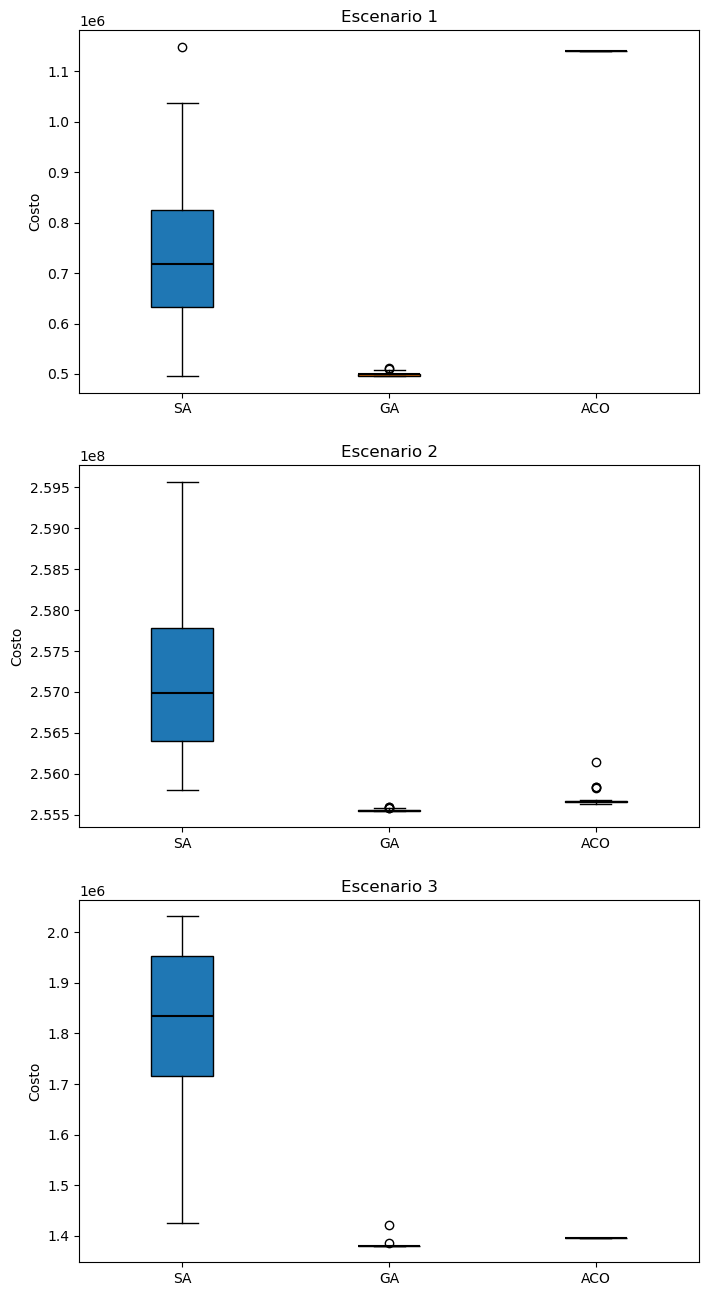

In [7]:
colors = ['C0', 'C1', 'C2']
algos = ['SA', 'GA', 'ACO']

fig, ax = plt.subplots(3,1, figsize=(8, 16))

for i in range(3):
    sols = []
    # params SA
    t_inicial = 200
    alpha = 0.966
    
    sol = df_sa_runs[i]
    sol = sol[(sol['T_inicial'] == t_inicial)]
    sol = sol[(sol['alpha'] > alpha) & (sol['alpha'] < alpha + 0.001)]
    sols.append(sol['costo'])
    
    # params GA
    mut = 0.5
    cruce = 0.1
    size = 150
    ngen = 500
    
    sol = df_ga_runs[i]
    sol = sol[(sol['T_mutacion'] == mut) & 
              (sol['T_cruce'] == cruce) & 
              (sol['size_pob'] == size) & 
              (sol['N_gen'] == ngen)]
    sols.append(sol['costo'])
    
    # params ACO
    eva = 0.5
    colony = 20
    ngen = 50
    alpha = 1
    beta = 1
    
    sol = df_aco_runs[i]
    sol = sol[(sol['T_evaporacion'] == eva) & 
              (sol['size_col'] == colony) & 
              (sol['N_gen'] == ngen) & 
              (sol['alpha'] == alpha) & 
              (sol['beta'] == beta)]
    sols.append(sol['costo'])
    
    box = ax[i].boxplot(sols,
                labels=algos,
                patch_artist=True,
                medianprops=dict(color='black', linewidth=1.5))
    
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    ax[i].set_title(f'Escenario {i+1}')
    ax[i].set_ylabel('Costo')
plt.rcParams['font.size'] = 12
plt.show()


<Figure size 1200x400 with 0 Axes>

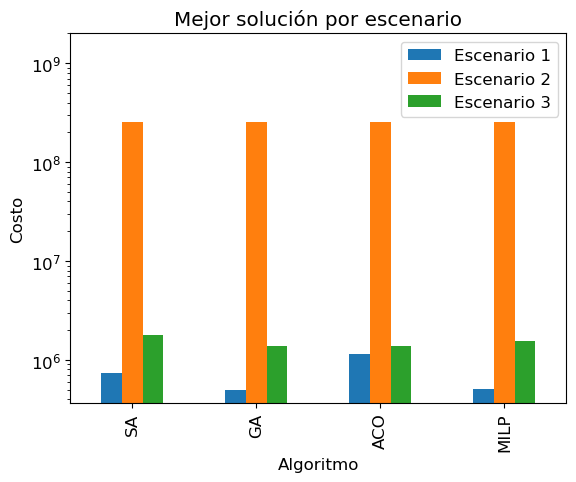

In [8]:
plt.figure(figsize=(12, 4))
bar_df = pd.DataFrame([
    ['SA', 736360.37, 257000028.50, 1783599.56],
    ['GA', 498995.21 , 255553485.90, 1380410.61],
    ['ACO', 1139660.00, 255640515.00, 1395000.00],
    ['MILP', 503833.00, 255547195.12, 1563324.00]],
columns=['Algoritmo', 'Escenario 1', 'Escenario 2', 'Escenario 3'])

bar_df.plot(x='Algoritmo', kind='bar', stacked=False, title='Mejor solución por escenario')
plt.rcParams['font.size'] = 12
plt.yscale('log')
plt.ylabel('Costo')
plt.ylim(top=20.e8)
plt.show()

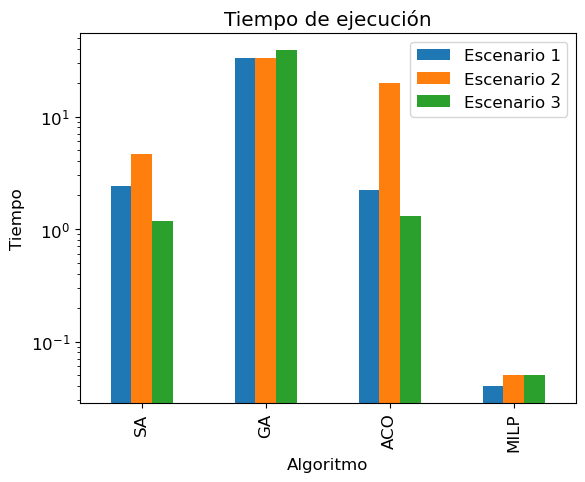

In [9]:
bar_df = pd.DataFrame([
    ['SA', 2.43, 4.67, 1.17],
    ['GA', 33.39, 32.98, 38.79],
    ['ACO', 2.23, 19.80, 1.31],
    ['MILP', 0.04, 0.05, 0.05]],
    columns=['Algoritmo', 'Escenario 1', 'Escenario 2', 'Escenario 3'])

bar_df.plot(x='Algoritmo', kind='bar', stacked=False, title='Tiempo de ejecución')
plt.rcParams['font.size'] = 12
plt.yscale('log')
plt.ylabel('Tiempo')
# plt.ylim(top=20.e8)
plt.show()